<h1 style="color:blue; background:lightblue; line-height:2; text-align:center;">* Quora Question Pair Similarity using BOW and Simple ANN *</h1>

<h2 style="color:blue; background:pink; line-height:1.5">Import basic libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:blue; background:pink; line-height:1.5">Load Preprocessed and balalced data</h2>

In [2]:
balanced=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Final_ Project_Quora_Question_Pair_Similarity/data/feat_extr_data.csv')
balanced.head(2)

,question1,question2,is_duplicate,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what minor would complement a computer science...,what is a good minor that will compliment a co...,1,52,66,8,12,19,8,0.42,...,0.499996,1.0,1.0,4.0,10.0,0.547170,81,85,81,83
1,how can i materialize an idea,what is the best way to materialize on an idea,1,29,46,6,10,16,2,0.12,...,0.299997,1.0,0.0,4.0,8.0,0.433333,64,72,53,79


In [3]:
balanced['is_duplicate'].value_counts()

1    25000
0    24998
Name: is_duplicate, dtype: int64

<h2 style="color:blue; background:pink; line-height:1.5">Import required Tensorflow packages</h2>

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

<h2 style="color:blue; background:pink; line-height:1.5">Input and output features</h2>

In [5]:
X=balanced.drop("is_duplicate", axis=1)
y=balanced['is_duplicate']

<h2 style="color:blue; background:pink; line-height:1.5">Train Test split</h2>

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)
questions_train=list(x_train['question1'])+list(x_train['question2'])
questions_test=list(x_test['question1'])+list(x_test['question2'])

<h2 style="color:blue; background:pink; line-height:1.5">Seperate features which need to vectorize</h2>

In [7]:
extracted_features=['que1_len', 'que2_len', 'que1_num_words', 'que2_num_words', 'total_words', 'common_words',
       'shared_words', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 
       'first_word_eq', 'abs_len_diff', 'mean_len', 'long_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']
extracted_features_train=x_train[extracted_features]
extracted_features_test=x_test[extracted_features]

<h2 style="color:blue; background:pink; line-height:1.5">Vectorization using BOW</h2>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
cnv=CountVectorizer(max_features=6000)
cnv_fit=cnv.fit(questions_train)
x_train_ques=cnv_fit.transform(questions_train)
q1_array=x_train_ques[:(x_train_ques.shape[0]//2),]  #Vector containing question1
q2_array=x_train_ques[(x_train_ques.shape[0]//2):,]  #Vector containing question2
x_train_tf = hstack((q1_array, q2_array, extracted_features_train)).toarray()  #Concatenating as a single Vector
print("X train Transformed Shape", x_train_tf.shape)
print("y train Shape", y_train.shape)

x_test_ques=cnv_fit.transform(questions_test)
q1_array=x_test_ques[:(x_test_ques.shape[0]//2),]
q2_array=x_test_ques[(x_test_ques.shape[0]//2):,]
x_test_tf = hstack((q1_array, q2_array, extracted_features_test)).toarray()
print("X test Transformed Shape", x_test_tf.shape)
print("y test Shape", y_test.shape)

X train Transformed Shape (39998, 12022)
y train Shape (39998,)
X test Transformed Shape (10000, 12022)
y test Shape (10000,)


In [9]:
print(len(cnv.vocabulary_))

6000


<h2 style="color:blue; background:pink; line-height:1.5">Standardize the features</h2>

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_fit=scaler.fit(x_train_tf)
x_train_tf_std=scaler_fit.transform(x_train_tf)
x_test_tf_std=scaler_fit.transform(x_test_tf)
print(x_test_tf_std[:2])

[[-0.01000075 -0.02245988 -0.01658582 ...  0.70291371  0.54194062
   0.53003139]
 [-0.01000075 -0.02245988 -0.01658582 ...  0.86616788  1.24101736
   0.68149489]]


<h2 style="color:blue; background:pink; line-height:1.5">Build ANN model and store the experiment using MLFLOW</h2>

In [14]:
#!pip install mlflow

In [15]:
import mlflow
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [16]:
mlflow.set_experiment("Advance Approach using extracted features")

2023/06/01 11:04:36 INFO mlflow.tracking.fluent: Experiment with name 'Advance Approach using extracted features' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/578313837121169563', creation_time=1685617476736, experiment_id='578313837121169563', last_update_time=1685617476736, lifecycle_stage='active', name='Advance Approach using extracted features', tags={}>

Epoch 1/100
1250/1250 [==============================] - 16s 11ms/step - loss: 0.5045 - accuracy: 0.7444 - val_loss: 0.4682 - val_accuracy: 0.7705
Epoch 2/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.3424 - accuracy: 0.8394 - val_loss: 0.5022 - val_accuracy: 0.7731
Epoch 3/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2370 - accuracy: 0.8943 - val_loss: 0.6460 - val_accuracy: 0.7647
Epoch 4/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1551 - accuracy: 0.9359 - val_loss: 0.9321 - val_accuracy: 0.7586
Epoch 5/100
1250/1250 [==============================] - 22s 18ms/step - loss: 0.0965 - accuracy: 0.9623 - val_loss: 0.9633 - val_accuracy: 0.7589
Epoch 6/100
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0648 - accuracy: 0.9763 - val_loss: 1.2207 - val_accuracy: 0.7552
Epoch 7/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.0466 - accuracy: 0.9840 - val_loss: 1

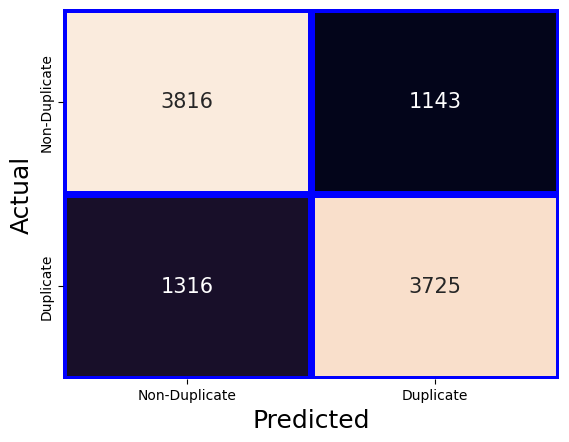

----------------------------------------------------------
Out of 10000 testing values 2459 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.74      0.77      0.76      4959
           1       0.77      0.74      0.75      5041

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

----------------------------------------------------------


In [17]:
with mlflow.start_run():
    mlflow.set_tag("Owner","Suraj H")
    mlflow.set_tag("Algorithm", "ANN adv")

    model=Sequential()
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(x_train_tf_std, y_train, epochs=100, batch_size=32,validation_data=(x_test_tf_std, y_test))

    y_pred=model.predict(x_test_tf_std)
    y_pred=np.where(y_pred>0.5, 1, 0)
    y_pred=y_pred.flatten()
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print("----------------------------------------------------------")
    print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
    print("----------------------------------------------------------")
    print("Confusion Matrix=\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
                yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
    plt.xlabel("Predicted",fontsize=18)
    plt.ylabel("Actual",fontsize=18)
    plt.savefig("resources_advance_approach_using_extracted_features/ANN_adv_conf_matrix.png")
    plt.show()
    print("----------------------------------------------------------")
    print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
    print("----------------------------------------------------------")
    print("Classification Report=\n", classification_report(y_test,y_pred))
    print("----------------------------------------------------------")
    
    mlflow.log_metrics({"Accuracy":acc, "Precision":precision, "Recall":recall, "F1 Score":f1})
    #mlflow.sklearn.log_model(model, artifact_path="models")
    mlflow.log_artifact("resources_advance_approach_using_extracted_features/ANN_adv_conf_matrix.png")

<h4 style="color:blue; line-height:1.5">Accuracy is 75%</h4>